In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import os
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
infile = open('/content/drive/MyDrive/x_train_file2','rb')
X = pickle.load(infile)
infile.close()

img_size = 224
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [4]:
infile = open('/content/drive/MyDrive/y_train_file2','rb')
y = pickle.load(infile)
infile.close()

Y = np.array(y)

In [5]:
infile = open('/content/drive/MyDrive/x_test_file','rb')
X_test = pickle.load(infile)
infile.close()

In [6]:
img_size = 224
X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)

In [7]:
infile = open('/content/drive/MyDrive/y_test_file','rb')
y_test = pickle.load(infile)
infile.close()

Y_test = np.array(y_test)

In [8]:
import tensorflow as tf
model = tf.keras.applications.MobileNetV2()

14548992/14536120 [==============================] - 0s 0us/step


In [9]:
base_input = model.layers[0].input
base_output = model.layers[-2].output

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation = 'softmax')(final_output)

In [12]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [13]:
for layer in new_model.layers:
	layer.trainable = False

In [14]:
new_model.get_layer('dense').trainable = True
new_model.get_layer('activation').trainable = True
new_model.get_layer('dense_1').trainable = True
new_model.get_layer('activation_1').trainable = True
new_model.get_layer('dense_2').trainable = True

In [15]:
new_model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

In [16]:
history = new_model.fit(X, Y, epochs = 25,validation_data =(X_test[:3687], Y_test[:3687]))

Epoch 1/25
577/577 [==============================] - 623s 1s/step - loss: 1.7854 - accuracy: 0.2643 - val_loss: 1.7042 - val_accuracy: 0.3146
Epoch 2/25
577/577 [==============================] - 632s 1s/step - loss: 1.6801 - accuracy: 0.3290 - val_loss: 1.6620 - val_accuracy: 0.3260
Epoch 3/25
577/577 [==============================] - 648s 1s/step - loss: 1.6441 - accuracy: 0.3473 - val_loss: 1.6631 - val_accuracy: 0.3341
Epoch 4/25
577/577 [==============================] - 647s 1s/step - loss: 1.6146 - accuracy: 0.3610 - val_loss: 1.6224 - val_accuracy: 0.3607
Epoch 5/25
577/577 [==============================] - 647s 1s/step - loss: 1.5891 - accuracy: 0.3728 - val_loss: 1.5968 - val_accuracy: 0.3680
Epoch 6/25
577/577 [==============================] - 652s 1s/step - loss: 1.5664 - accuracy: 0.3876 - val_loss: 1.6620 - val_accuracy: 0.3350
Epoch 7/25
577/577 [==============================] - 652s 1s/step - loss: 1.5472 - accuracy: 0.3937 - val_loss: 1.6414 - val_accuracy: 0.3594

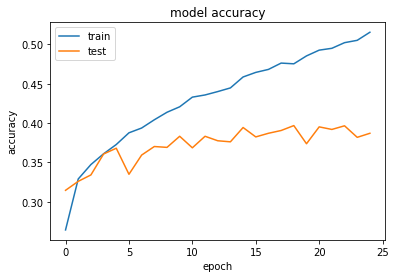

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

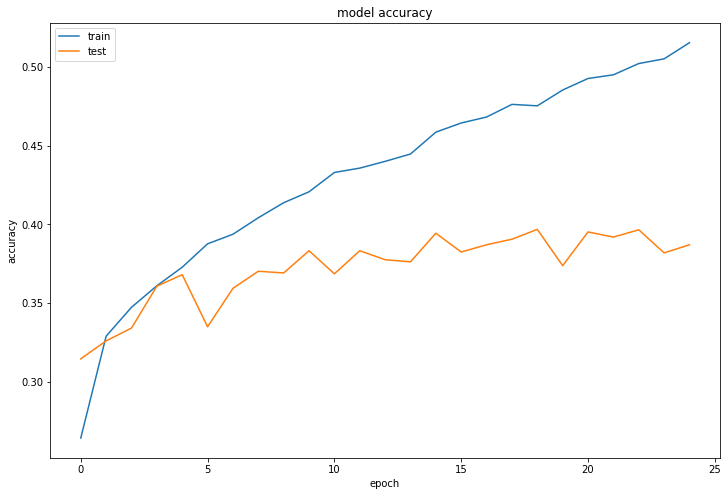

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

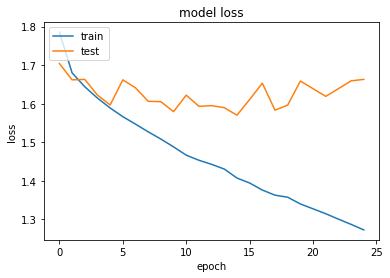

In [18]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
new_model.evaluate(X_test, Y_test)

185/185 [==============================] - 176s 948ms/step - loss: 1.6835 - accuracy: 0.3810


[1.6834982633590698, 0.3809765875339508]